In [29]:
import numpy as np
from collections import Counter, defaultdict
from copy import copy, deepcopy
import matplotlib.pyplot as plt
from IPython.display import display, HTML
display(HTML('<style>.container {width: 100% !important} </style>'))

In [39]:
def create_initial_population(n=None, k1=None, k2=None):
    if k1 is None and k2 is None and n is None:
        n = 10000
        sixers = [Struct("111111") for i in range(n)] + [Struct("000000") for i in range(n)]
        return Population([], [], sixers)

    n_fivers = n_oners = int(np.floor(- k1 + np.sqrt(k1**2 + 2/3 * k1*k2 * n)/ (2 * k2)))
    n_sixers = int(np.floor(n/6 - n_fivers))

    sixers = [Struct("111111") for i in range(n_sixers)] + [Struct("000000") for i in range(n_sixers)]
    fivers = [Struct("11111") for i in range(n_fivers)] + [Struct("00000") for i in range(n_fivers)]
    oners = [Struct("1") for i in range(n_oners)] + [Struct("000000") for i in range(n_oners)]

    return Population(oners, fivers, sixers)
    
p0 = create_initial_population(10000, 0.0001, 0.1)
p0.describe()

Counter({000000: 1666, 111111: 1665, 11111: 1, 00000: 1, 1: 1})

In [75]:
for i in range(64):
    print(format(i, '#08b')[2:])

000000
000001
000010
000011
000100
000101
000110
000111
001000
001001
001010
001011
001100
001101
001110
001111
010000
010001
010010
010011
010100
010101
010110
010111
011000
011001
011010
011011
011100
011101
011110
011111
100000
100001
100010
100011
100100
100101
100110
100111
101000
101001
101010
101011
101100
101101
101110
101111
110000
110001
110010
110011
110100
110101
110110
110111
111000
111001
111010
111011
111100
111101
111110
111111


In [45]:
populations = [p0]
n_steps = 100_000
previous = p0
for i in tqdm(range(n_steps)):
    previous = next_step(previous, 0.0001, 0.1)
    if i % 100 == 0:
        populations.append(previous)
    break

  0%|                                                | 0/100000 [00:00<?, ?it/s]

Counter({(000000,): 1665, (111111,): 1664, (111112, 1): 1})


In [32]:
parallel = Parallel(n_jobs=-1)
parallel(delayed(lambda x: x)(i) for i in range(10))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [15]:
keys = set(k for p in populations[-10:] for k in p.describe().keys())

In [16]:
def plot(key, populations, ax, subsample=1):
    ax.plot([p.describe()[key] for i, p in enumerate(populations) if i%subsample == 0])
    ax.set_title(key)

100%|███████████████████████████████████████████| 47/47 [00:23<00:00,  2.03it/s]


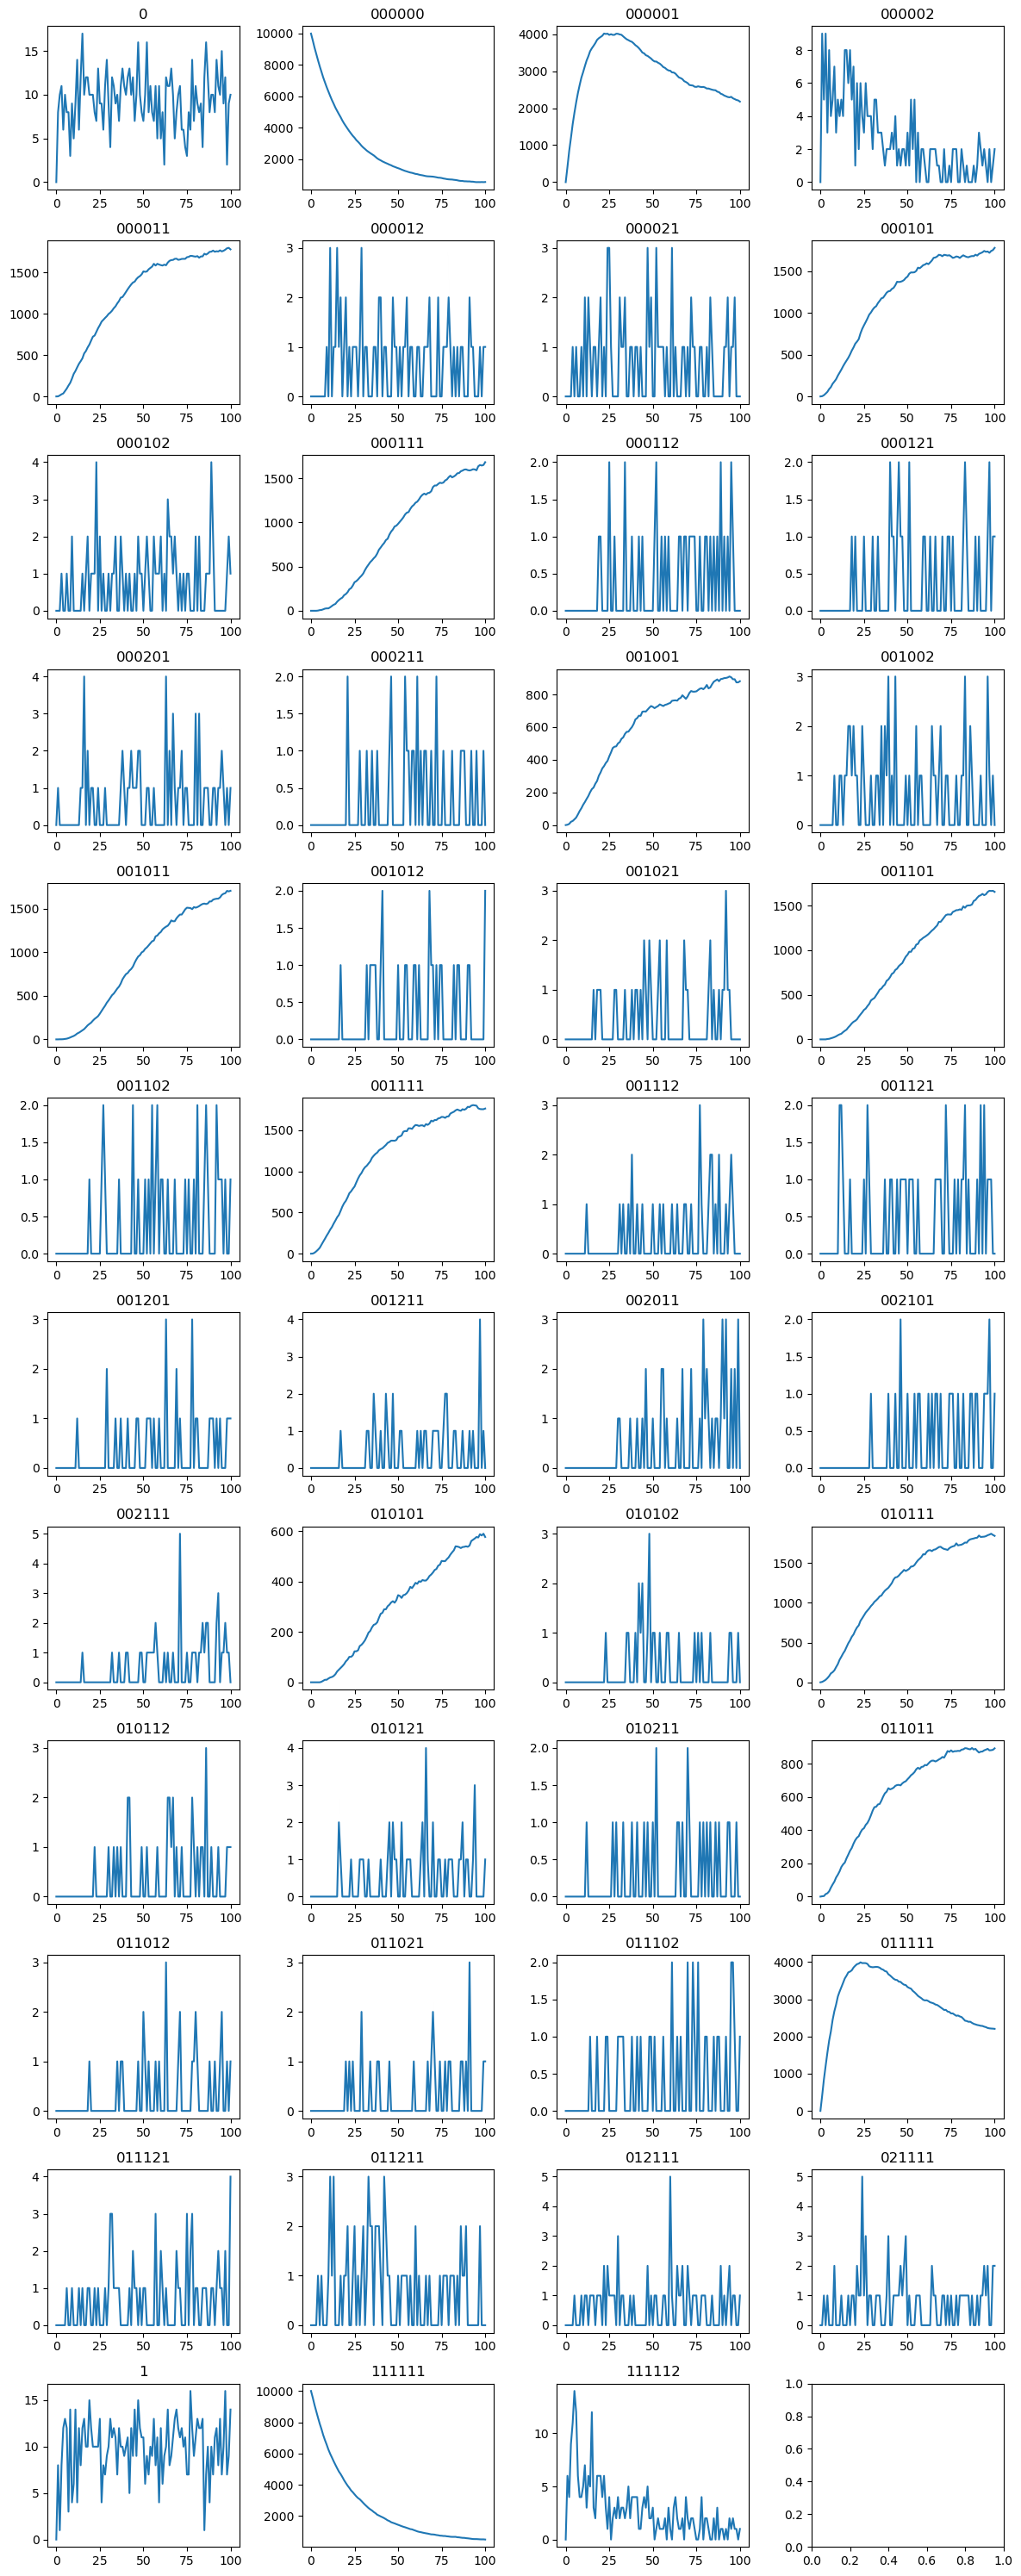

In [18]:
fig, axs = plt.subplots(nrows=12, ncols=4, figsize=(12, 30))

for i, key in enumerate(tqdm(sorted(keys))):
    plot(key, populations, axs[i // 4, i % 4], 10)

plt.tight_layout()
plt.savefig("example.png")
plt.show()